# Online Retail of a Store

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Data Dictionary

|No.| Column Name | Full Name |Data Type | Description|
|---| --- | ----------- |-----------|------------|
|1| InvoiceNo | Invoice number | Nominal| a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C' = cancellation, 'A' = Bad debt adjustment, '5' = Sales Data  |
|2| StockCode | Unique Inventory code | Nominal| a 5-digit integral number uniquely assigned to each distinct product |
|3| Description | Product (item) name | Nominal | Detailed description of the product with name |
|4| Quantity | Sold Quantity |Numeric | The quantities of each product (item) per transaction. |
|5| InvoiceDate | Invoice date and time  | Time Stamp | Transaction date and time where the sales is record by a customer|
|6| UnitPrice | Price per unit | Numerical | Product price per unit in dollars |
|7| CustomerID | Customer number | Nominal | a 5-digit integral number uniquely assigned to each customer |
|8| Country | Country Name | Nominal | Geographical locations where orders has been received by customers |

# 1. Importing Libraries

In [15]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math
import datetime as datetime

! pip install squarify
import squarify as sq

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Read Dataset in Pandas DataFrame
retail = pd.read_csv('dataset-ecommerce-shop.csv')
retail_org = retail.copy()

In [17]:
# Displaying all columns
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **2. Data Cleaning**

## Drop Duplicates

In [4]:
print("Total duplicate rows are", retail.duplicated().sum())

Total duplicate rows are 5268


In [4]:
# Count the number of rows and columns and drop duplicate rows
print("Total rows and columns are" , retail.shape)

retail = retail.drop_duplicates()

print("Total rows and columns after removing duplicates are", retail.shape)

Total rows and columns are (541909, 8)
Total rows and columns after removing duplicates are (536641, 8)


## Removing White Spaces / Extra Spaces in all rows 

In [5]:
retail = retail.iloc[:].replace(" ", "")

- Replacing blank spaces with no space

## Checking Null Values

In [6]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [7]:
# Calculating % of Null Values in dataset to decide whether to eradicate the data or not.
null_customer = retail['CustomerID'].isnull().sum()
null_description = retail['Description'].isnull().sum()
total = len(retail)

print( "% of null values in Customer ID is", round(null_customer/ total * 100,2), "%")
print("% of null values in Description is", round(null_description / total * 100,2), "%")


% of null values in Customer ID is 25.16 %
% of null values in Description is 0.27 %


Values in **Customer ID** Column is missing. Let's further investiage this column. The ratio of missing data in Customer ID is 24.93% and we cannot remove this much data as it will impact our Total Revenue.

We can use function similar to Colaesce where Null Customer IDs will replaced by their respective Invoice ID and similar Invoice IDs group as 1 new customer. In this way, we can calculate our total number of Customer.

For that, we will create one new column with the name **"New ID"** and replace null Customer IDs with Invoice IDs.

In [28]:
retail['NewID'] = np.where(retail['CustomerID'].isnull(),retail['InvoiceNo'],retail['CustomerID'])

customer = retail['CustomerID'].nunique()

null_invoices = retail[retail.CustomerID.isnull()]['InvoiceNo'].nunique()


new_ids = retail['NewID'].nunique()

print("Verification of Total Customer: \n")
print("• Number of Customers:", customer, "\n")

print("• Number of Orders where CustomerID in Null:", null_invoices, "\n")

print("• Number of Customers + Number of Orders where CustomerID in Null:", customer + null_invoices,"\n")

print("• Number of New ID's:", new_ids)

Verification of Total Customer: 

• Number of Customers: 4372 

• Number of Orders where CustomerID in Null: 3710 

• Number of Customers + Number of Orders where CustomerID in Null: 8082 

• Number of New ID's: 8082


In [29]:
retail[retail['CustomerID'].isnull()].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,NewID
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00,536414
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51,536544
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02,536544
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40,536544
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32,536544


In [30]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0


## Check Data Types

In [11]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
 8   NewID        536641 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 40.9+ MB


In [12]:
# Change Data type of Customer ID
retail = retail['CustomerID'].astype(object)

In [18]:
# Change Date type of Invoice date
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

# Printing minimum and maximum Invoice Dates
print("Starting Invoice Date", min(retail["InvoiceDate"]))
print("Ending Invoice Date", max(retail["InvoiceDate"]))

Starting Invoice Date 2010-12-01 08:26:00
Ending Invoice Date 2011-12-09 12:50:00


The transactional data is from **Dec-2010 to Dec-2011**

In [19]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Data Attributes

In [20]:
# Basic Summary of dataset
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The minimum values of **Quantity** and **Unit Price** is negative. Quantities that are in negative shows that the parcels has been returned by the customers. Hence, showing negative quantity.

In [21]:
# Basic Summary of dataset
retail.describe(include = 'O')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [22]:
# Total Order with Unit Price 0
print('Total Orders with Unit price "Zero" is', len(retail[retail['UnitPrice']== 0]))

Total Orders with Unit price "Zero" is 2515


# **3. Data Preparation**

#### **Extract a new column "Total Revenue" From Quantity and UnitPrice of each order**

In [31]:
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0


## **Cancelled Orders**

In [32]:
cancelled_order = retail[retail['InvoiceNo'].astype(str).str.startswith('C')]
cancelled_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,NewID
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,17548.0


In [33]:
# Aggregatoing Columns 
print("• Total no. of customers in order cancellation data are:", cancelled_order['NewID'].nunique(),"\n")

print("• Total no. of cancelled orders:", cancelled_order['InvoiceNo'].nunique(),"\n")

print("• Total no. of stock types is:", cancelled_order['StockCode'].nunique(),"\n")

print("• Total Quantity of products returned are:",cancelled_order['Quantity'].sum(),"\n")

print("• Total Revenue of Cancelled orders is:",cancelled_order['Revenue'].sum().round(2),"\n")

• Total no. of customers in order cancellation data are: 1771 

• Total no. of cancelled orders: 3836 

• Total no. of stock types is: 1947 

• Total Quantity of products returned are: -277574 

• Total Revenue of Cancelled orders is: -896812.49 



In [34]:
cancelled_order.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,9288.000000,9288.000000,8905.000000,9288.000000
mean,-29.885228,48.393661,14991.667266,-96.556039
std,1145.786965,666.600430,1706.772357,2039.905511
min,-80995.000000,0.010000,12346.000000,-168469.600000
25%,-6.000000,1.450000,13510.000000,-17.700000
50%,-2.000000,2.950000,14895.000000,-8.500000
75%,-1.000000,5.950000,16393.000000,-3.700000
max,-1.000000,38970.000000,18282.000000,-0.120000


In [35]:
# Top Countries in Order Cancellation dataset

cancelled_order.groupby('Country').agg({'InvoiceNo': 'count', 'InvoiceNo': 'count', 'Quantity': 'sum', 'Revenue': 'sum'})\
                                  .sort_values(['InvoiceNo', 'Quantity'], ascending = [False, False])\
                                  .head(5)

,InvoiceNo,Quantity,Revenue
Country,,,
United Kingdom,7856,-263033,-815291.60
Germany,453,-1815,-7168.93
EIRE,302,-4810,-20177.14
France,149,-1624,-12311.21
USA,112,-1424,-1849.47


High number of cancelled orders are from **United Kingdom** as most of the transactional activity occur in this country.

## Adjusted Orders

Invoice No. starts with "A" are **bad debt adjustments** and not included in sales data

In [36]:
adjusted_order = retail[retail['InvoiceNo'].astype(str).str.startswith('A')]
adjusted_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,NewID
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06,A563185
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06,A563186
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06,A563187


In [37]:
adjusted_order.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,3.0,3.000000,0.0,3.000000
mean,1.0,-3687.353333,NaN,-3687.353333
std,0.0,12773.366638,NaN,12773.366638
min,1.0,-11062.060000,NaN,-11062.060000
25%,1.0,-11062.060000,NaN,-11062.060000
50%,1.0,-11062.060000,NaN,-11062.060000
75%,1.0,0.000000,NaN,0.000000
max,1.0,11062.060000,NaN,11062.060000


## Total Orders

In [38]:
order = retail[retail['InvoiceNo'].astype(str).str.startswith('5')]
order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0


In [39]:
# Rows and Columns or order table
print("• Rows and columns in fulfilled orders started with 5",order.shape)

# Filter order table to include orders that start with digit 5 and filter quantity and unit price as it is irrelevant

order = order[(order['Quantity'] > 0) & (order['UnitPrice'] != 0)]
print("• Rows and columns in fulfilled orders after removing irrelevant data", order.shape)

• Rows and columns in fulfilled orders started with 5 (532618, 10)
• Rows and columns in fulfilled orders after removing irrelevant data (530103, 10)


In [40]:
order.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132219
Country             0
Revenue             0
NewID               0
dtype: int64

There are still null values in the Customer ID. We can use Coalesce function to count Customer ID from Invoice ID where Customer ID is null as described in **Data Cleaning Process**

In [41]:
order.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,530103.000000,530103.000000,397884.000000,530103.000000
mean,10.542055,3.886765,15294.423453,20.101042
std,155.524270,32.546281,1713.141560,269.931295
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [42]:
order.describe(include = 'O')

,InvoiceNo,StockCode,Description,Country,NewID
count,530103,530103,530103,530103,530103.0
unique,19959,3921,4025,38,5765.0
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,17841.0
freq,1114,2265,2323,485122,7847.0


In [43]:
# Aggregatoing Columns 
print("• Total number of customers are:", order['NewID'].nunique(),"\n")
print("• Total number of customers are:", order['CustomerID'].nunique(),"\n")

print("• Total no. of orders:", order['InvoiceNo'].nunique(),"\n")

print("• Total no. of stocks type is:", order['StockCode'].nunique(),"\n")

print("• Total sold quantity is:",order['Quantity'].sum(),"\n")

print("• Total Revenue is:",order['Revenue'].sum().round(2),"\n")

print("• Total number of countries are:",order['Country'].nunique(),"\n")

• Total number of customers are: 5765 

• Total number of customers are: 4338 

• Total no. of orders: 19959 

• Total no. of stocks type is: 3921 

• Total sold quantity is: 5588375 

• Total Revenue is: 10655622.48 

• Total number of countries are: 38 



In [44]:
#get the order by country
order.groupby(['Country']).agg({'CustomerID':'count', 'UnitPrice':'mean', 'Quantity':'sum'})\
                            .sort_values('CustomerID', ascending=False).head(10)

,CustomerID,UnitPrice,Quantity
Country,,,
United Kingdom,354321,3.826885,4662389
Germany,9040,3.709308,119261
France,8341,4.400237,112103
EIRE,7236,4.878321,147173
Spain,2484,3.826224,27940
Netherlands,2359,2.648465,200361
Belgium,2031,3.630158,23237
Switzerland,1841,3.374547,30629
Portugal,1462,5.843251,16258


# 5. Data Exploration and Analysis 

### Now, the data is divided into four tables:

1. **Retail:** It contains all the data related to all tables (duplicates and missing values have been removed and treated)


2. **Order:** It contains all the _fullfilled orders


3. **Cancellation_order:** It contains all the orders that have been _cancelled_


4. **Adjusted_order:** It contain _bad debt adjustment_

## Order Analysis

In [45]:
order['InvoiceDate'] = pd.to_datetime(order['InvoiceDate'])
order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0


In [46]:
order['Year'] = pd.DatetimeIndex(order['InvoiceDate']).year
order['MonthNo'] = pd.DatetimeIndex(order['InvoiceDate']).month
order['Month'] = pd.DatetimeIndex(order['InvoiceDate']).month_name()
order['Day'] = pd.DatetimeIndex(order['InvoiceDate']).day_name()
order['Hour'] = pd.DatetimeIndex(order['InvoiceDate']).hour

order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,NewID,Year,MonthNo,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,17850.0,2010,12,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0,2010,12,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,17850.0,2010,12,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0,2010,12,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,17850.0,2010,12,December,Wednesday,8


# **4. Data Visualization**


## Total Customers Month and Year Wise


### **What is the Total number of orders and Revenue Month and Year Wise?**

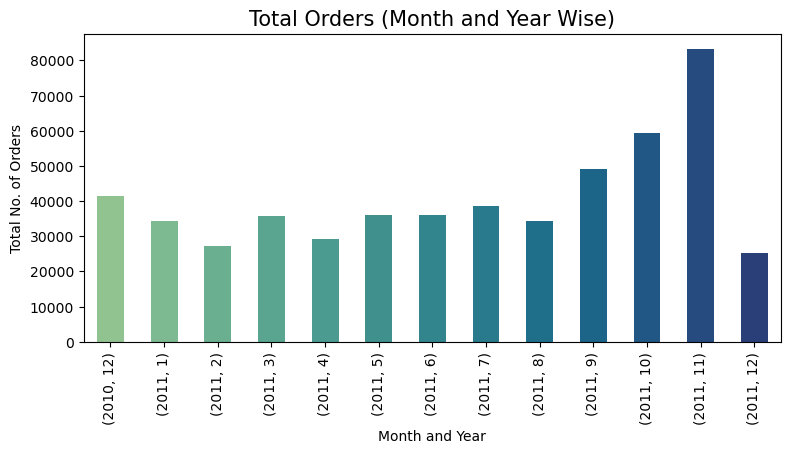

Year  MonthNo
2010  12         41480
2011  1          34306
      2          27105
      3          35803
      4          29096
      5          36164
      6          35977
      7          38645
      8          34482
      9          49261
      10         59304
      11         83369
      12         25111
Name: InvoiceNo, dtype: int64


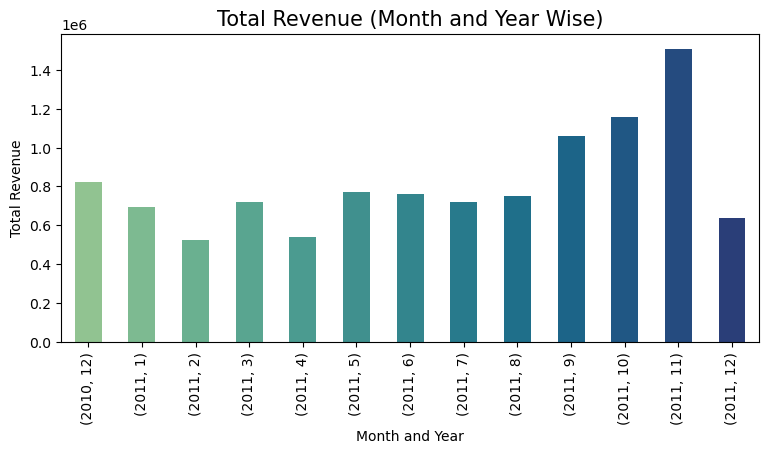

Year  MonthNo
2010  12         41480
2011  1          34306
      2          27105
      3          35803
      4          29096
      5          36164
      6          35977
      7          38645
      8          34482
      9          49261
      10         59304
      11         83369
      12         25111
Name: InvoiceNo, dtype: int64


In [47]:
# Setting Style
sns.axes_style("white")

# Groupby Orders Year and Month wise
Total_orders = order.groupby(['Year','MonthNo'])['InvoiceNo'].count()

# Color Palette
palette =sns.color_palette("crest", 13)

#Plotting
Total_orders.plot(kind='bar', color = palette, figsize=(9,4))

# Setting title and label
plt.title("Total Orders (Month and Year Wise)", fontsize=15)
plt.xlabel("Month and Year")
plt.ylabel("Total No. of Orders")

#Show the plot
plt.show()

print(Total_orders)



# Groupby Orders Year and Month wise
Total_revenue = order.groupby(['Year','MonthNo'])['Revenue'].sum()

# Color Palette
palette = sns.color_palette("crest",13)

#Plotting
Total_revenue.plot(kind='bar', color = palette, figsize=(9,4))

# Setting title and label
plt.title("Total Revenue (Month and Year Wise)", fontsize=15)
plt.xlabel("Month and Year")
plt.ylabel("Total Revenue")

#Show the plot
plt.show()

print(Total_orders)

---
Based on the above graph, November is the month with the highest sales and February is the month with the lowest sales. Half of the months shows a decrease in sales as compared to previous months and 06 months shows an increase in sales as compared to previous sales. 

The overall Revenue is $ 10 Million.

---

### What are the total orders and Revenue week wise?

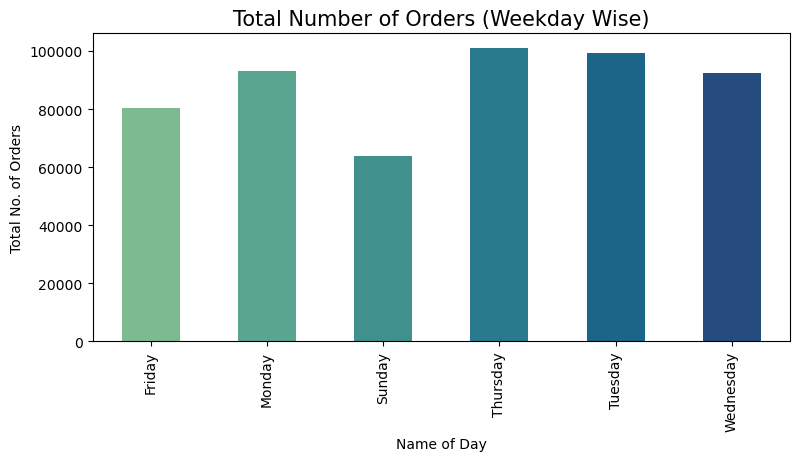

Day
Friday        80280
Monday        93136
Sunday        63905
Thursday     101007
Tuesday       99460
Wednesday     92315
Name: InvoiceNo, dtype: int64


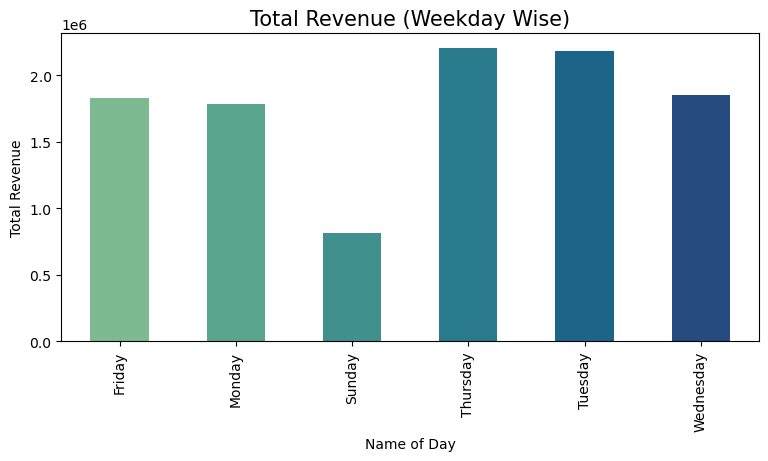

Day
Friday        80280
Monday        93136
Sunday        63905
Thursday     101007
Tuesday       99460
Wednesday     92315
Name: InvoiceNo, dtype: int64


In [48]:
# set seaborn plot style
sns.axes_style(style="whitegrid") 

# Groupby Orders Week wise
Total_orders = order.groupby(['Day'])['InvoiceNo'].count()

# Color Palette
palette = sns.color_palette("crest",6)

#Plotting
Total_orders.plot(kind='bar', color = palette, figsize=(9,4))

# Setting title and label
plt.title("Total Number of Orders (Weekday Wise)", fontsize=15)
plt.xlabel("Name of Day")
plt.ylabel("Total No. of Orders")

#Show the plot
plt.show()

print(Total_orders)



# set seaborn plot style
sns.axes_style(style="whitegrid") 

# Groupby Revenue Week wise
Total_revenue = order.groupby(['Day'])['Revenue'].sum()

# Color Palette
palette = sns.color_palette("crest",6)

#Plotting
Total_revenue.plot(kind='bar', color = palette, figsize=(9,4))

# Setting title and label
plt.title("Total Revenue (Weekday Wise)", fontsize=15)
plt.xlabel("Name of Day")
plt.ylabel("Total Revenue")

#Show the plot
plt.show()

print(Total_orders)

---

Mostly orders have received on Thursday followed by Tuesday and same is the pattern for revenue generation which means that Customers are mostly active in these two days. This helps to analyze the peak time of orders receiving.

---

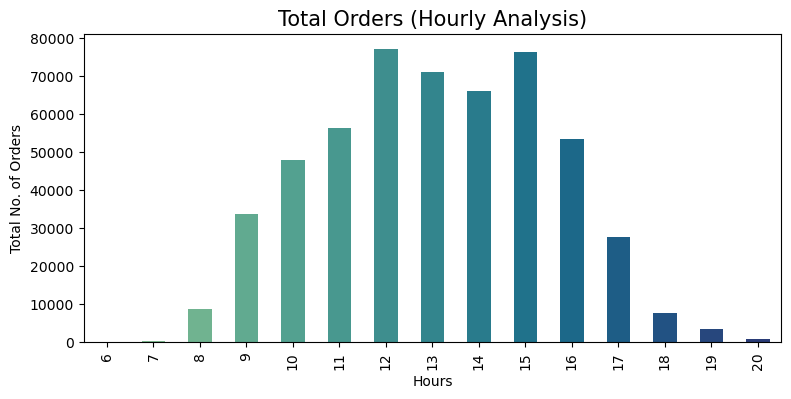

Hour
6         1
7       379
8      8800
9     33701
10    47822
11    56139
12    77120
13    71001
14    65936
15    76246
16    53369
17    27563
18     7709
19     3515
20      802
Name: InvoiceNo, dtype: int64


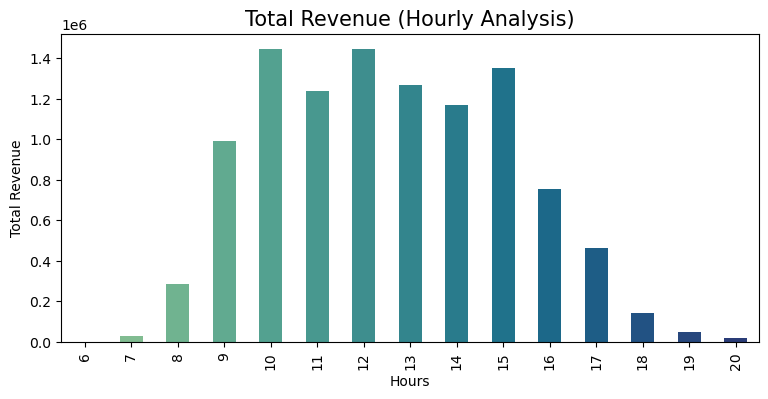

Hour
6         1
7       379
8      8800
9     33701
10    47822
11    56139
12    77120
13    71001
14    65936
15    76246
16    53369
17    27563
18     7709
19     3515
20      802
Name: InvoiceNo, dtype: int64


In [49]:
# Groupby Orders Hour wise
Total_orders = order.groupby(['Hour'])['InvoiceNo'].count()

# Color Palette
palette = sns.color_palette("crest",15)

#Plotting
Total_orders.plot(kind='bar', color = palette, figsize=(9,4))

# Setting title and label
plt.title("Total Orders (Hourly Analysis)", fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Total No. of Orders")

#Show the plot
plt.show()

print(Total_orders)



# Groupby Revenue Hour wise
Total_revenue = order.groupby(['Hour'])['Revenue'].sum()

# Color Palette
palette = sns.color_palette("crest",15)

#Plotting
Total_revenue.plot(kind='bar', color = palette, figsize=(9,4))

# Setting title and label
plt.title("Total Revenue (Hourly Analysis)", fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Total Revenue")

#Show the plot
plt.show()

print(Total_orders)

---
Majority orders have received from 12pm-3pm. This is the peak time of orders receiving. That’s why, this graph helps to analyze the most responsive time of customers.  

---

## Top Countries 

### What is the top number of orders fulfilled in each country?

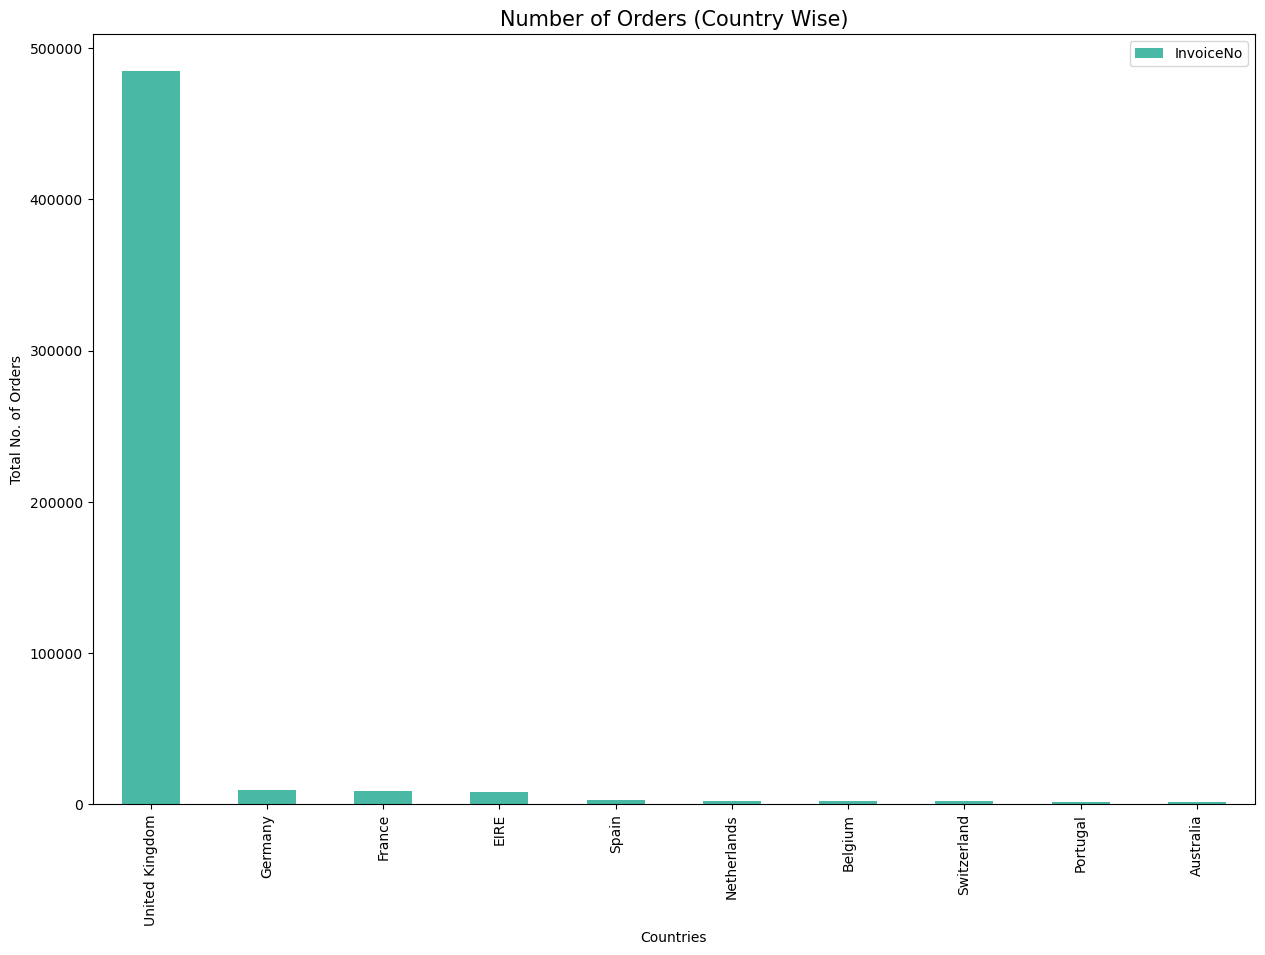

Top 10 Countries with most orders are:
                 InvoiceNo
Country                  
United Kingdom     485122
Germany              9040
France               8407
EIRE                 7890
Spain                2484 

% of Top 10 countries with most orders are:
 United Kingdom    0.915147
Germany           0.017053
France            0.015859
EIRE              0.014884
Spain             0.004686
Name: Country, dtype: float64


In [50]:
# Total Number of orders (Country Wise)
top_country = order.groupby(['Country']).agg({'InvoiceNo':'count'})\
                            .sort_values('InvoiceNo', ascending=False).head(10)
# Total % of orders (Country Wise)
orders_perc = order['Country'].value_counts(normalize = True).head(10)

palette =sns.color_palette('crest')

#Plotting
top_country.plot(kind='bar', figsize=(15,10), color ='#1CA68F', alpha = 0.8)

# Setting title and label
plt.title("Number of Orders (Country Wise)", fontsize=15)
plt.xlabel("Countries")
plt.ylabel("Total No. of Orders")

#Show the plot
plt.show()

print("Top 10 Countries with most orders are:\n",top_country.head(5),"\n")
print("% of Top 10 countries with most orders are:\n", orders_perc.head(5))

• 92% orders have been received from **United Kingdom** with **485122** orders

### What is the total revenue generated in each country?

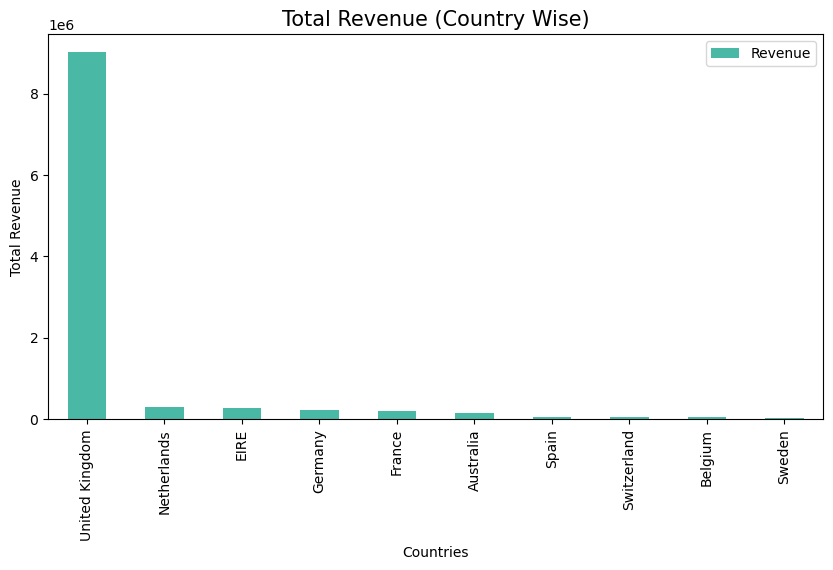

Top 10 Countries with most revenue are:
                     Revenue
Country                    
United Kingdom  9014160.024
Netherlands      285446.340
EIRE             283453.960
Germany          228867.140
France           209715.110 

% of Top 10 countries with most revenue are:
                   Revenue
Country                  
United Kingdom  84.595340
Netherlands      2.678833
EIRE             2.660135
Germany          2.147853
France           1.968117


In [51]:
# Total Number of orders (Country Wise)
top_country = order.groupby(['Country']).agg({'Revenue':'sum'})\
                            .sort_values('Revenue', ascending=False).head(10)

# Total % of orders (Country Wise)
for col in top_country:
    country_perc = top_country / order['Revenue'].sum() * 100


#Plotting
top_country.plot(kind='bar', figsize=(10,5), color ='#1CA68F', alpha = 0.8)

# Setting title and label
plt.title("Total Revenue (Country Wise)", fontsize=15)
plt.xlabel("Countries")
plt.ylabel("Total Revenue")

#Show the plot
plt.show()

print("Top 10 Countries with most revenue are:\n",top_country.head(5),"\n")
print("% of Top 10 countries with most revenue are:\n", country_perc.head(5))

• **84% Revenue** is generated from **United Kingdom i.e.9014160.024**

## Top Selling Products  

### What are the top selling products (Quantity wise)?

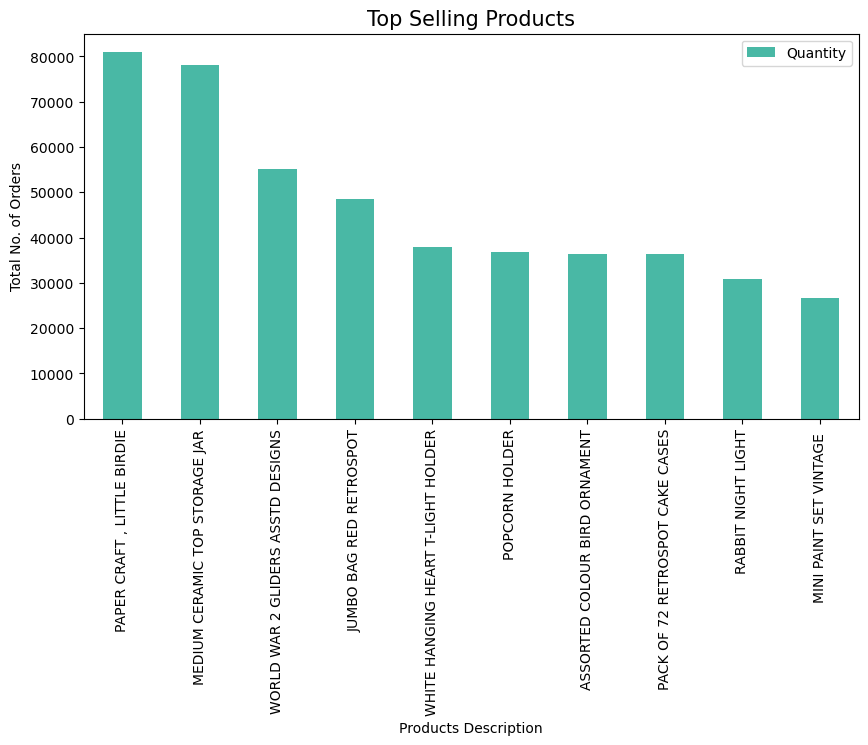

Top 10 Products with most order quantity are:
                                     Quantity
Description                                 
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS      55047
JUMBO BAG RED RETROSPOT                48474
WHITE HANGING HEART T-LIGHT HOLDER     37891
POPCORN HOLDER                         36761
ASSORTED COLOUR BIRD ORNAMENT          36461
PACK OF 72 RETROSPOT CAKE CASES        36419
RABBIT NIGHT LIGHT                     30788
MINI PAINT SET VINTAGE                 26633 

% of Top 10 Products with most order quantity are:
                                     Quantity
Description                                 
PAPER CRAFT , LITTLE BIRDIE         1.449348
MEDIUM CERAMIC TOP STORAGE JAR      1.396345
WORLD WAR 2 GLIDERS ASSTD DESIGNS   0.985027
JUMBO BAG RED RETROSPOT             0.867408
WHITE HANGING HEART T-LIGHT HOLDER  0.678033
POPCORN HOLDER                      0.657812

In [52]:
# Top high quantity orders
top_selling_products = order.groupby(['Description']).agg({'Quantity':'sum'})\
                            .sort_values('Quantity', ascending=False).head(10)

# Total % of top selling orders 
for col in top_selling_products:
    orders_perc = top_selling_products / order['Quantity'].sum() *100
    
#Plotting
top_selling_products.plot(kind='bar', figsize=(10,5), color ='#1CA68F', alpha = 0.8)

# Setting title and label
plt.title("Top Selling Products", fontsize=15)
plt.xlabel("Products Description")
plt.ylabel("Total No. of Orders")

#Show the plot
plt.show()

print("Top 10 Products with most order quantity are:\n",top_selling_products.head(10),"\n")
print("% of Top 10 Products with most order quantity are:\n", orders_perc.head(10))


• Most Order quantity sold is **"PAPER CRAFT , LITTLE BIRDIE** with quantity sold **80995** (1.5% of total sold quantity)


###	What are the top selling products (Revenue wise)?

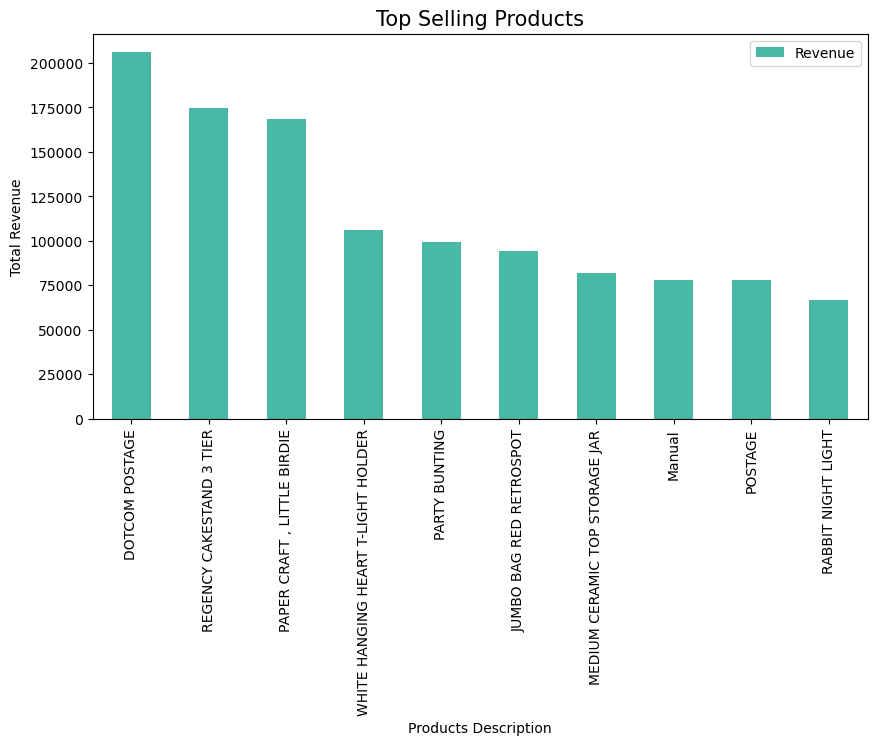

Top 10 Products with high Revenue are:
                                       Revenue
Description                                  
DOTCOM POSTAGE                      206248.77
REGENCY CAKESTAND 3 TIER            174484.74
PAPER CRAFT , LITTLE BIRDIE         168469.60
WHITE HANGING HEART T-LIGHT HOLDER  106292.77
PARTY BUNTING                        99504.33
JUMBO BAG RED RETROSPOT              94340.05
MEDIUM CERAMIC TOP STORAGE JAR       81700.92
Manual                               78112.82
POSTAGE                              78101.88
RABBIT NIGHT LIGHT                   66964.99 

% of Top 10 Products with high Revenue are:
                                      Revenue
Description                                 
DOTCOM POSTAGE                      1.935586
REGENCY CAKESTAND 3 TIER            1.637490
PAPER CRAFT , LITTLE BIRDIE         1.581039
WHITE HANGING HEART T-LIGHT HOLDER  0.997528
PARTY BUNTING                       0.933820
JUMBO BAG RED RETROSPOT             0.885355
M

In [53]:
# Top selling products
top_selling_products = order.groupby(['Description']).agg({'Revenue':'sum'})\
                            .sort_values('Revenue', ascending=False).head(10)

# Total % of top selling orders 
for col in top_selling_products:
    orders_perc = top_selling_products / order['Revenue'].sum() *100

#Plotting
top_selling_products.plot(kind='bar', figsize=(10,5), color ='#1CA68F', alpha = 0.8)

# Setting title and label
plt.title("Top Selling Products", fontsize=15)
plt.xlabel("Products Description")
plt.ylabel("Total Revenue")

#Show the plot
plt.show()

print("Top 10 Products with high Revenue are:\n",top_selling_products.head(10),"\n")
print("% of Top 10 Products with high Revenue are:\n", orders_perc.head(10))


- Top selling product is **Dotcom Postage** with **1.9%** in Total Revenue

# RFM ANALYSIS 


Process of RFM Analysis 
1. Calculate Recency, Frequency, and Monetary Values
2. Score designation to RFM Values and Building RFM Segments
3. Classify into Name Segments


##  1. Calculate RFM Values

**a. Recency**
- When was the last time the customer made a purchase? 
- Customers who purchased from you recently are more likely to buy from you again than customers from the distant past. This is the important ranking factor–that’s why it’s first in the list.

**b. Frequency**
- How often does the customer buy?
- A customer who is in every day is much more likely to buy again that someone who only comes in once a year. 
- How many invoices are registered by the same customer?

**c. Monetary**
- How much did your customer spend?
- A customer who makes a large purchase is more likely to buy again than a customer who spends less.


In [54]:
# Print the maximum and minimum date of Date
print('Min:{}; Max:{}'.format(min(order.InvoiceDate),max(order.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [55]:
# Add 01 more day in the last date of the sales transaction data
last_date = max(order.InvoiceDate)

In [56]:
# Calculating three columns of RFM Model: Recency, Frequency and Monetary
RFM_table = order.groupby(['NewID'], as_index=False).agg({'InvoiceDate': lambda x: (last_date - x.max()).days,
                                         'InvoiceNo': 'nunique',
                                         'Revenue': 'sum'})

#Renaming Column 
RFM_table = RFM_table.rename(columns={'InvoiceDate': 'Recency',
                          'InvoiceNo': 'Frequency',
                          'Revenue': 'Monetary'})

print("Total rows and columns are" , RFM_table.shape, "which shows the data of", order['NewID'].nunique(), "customers")

#Display first 10 rows of data
RFM_table.head(5)

Total rows and columns are (5765, 4) which shows the data of 5765 customers


,NewID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [57]:
RFM_table.describe()

,Recency,Frequency,Monetary
count,5765.000000,5765.000000,5765.000000
mean,116.506678,3.462099,1848.330006
std,111.308931,6.825156,7918.784038
min,0.000000,1.000000,0.420000
25%,22.000000,1.000000,240.680000
50%,71.000000,1.000000,632.400000
75%,198.000000,4.000000,1641.760000
max,373.000000,209.000000,280206.020000


## 2. Score Designation to RFM Values and Building RFM segments

Assign a number from 1 to 5 for each category, where 5 is the highest and 01 is the lowest. In order to calculate RFM, we´ll need some data on customers:
- Their most recent purchase date.
- Number of purchases within a set time period (i.e. one year).
- Total sales from that customer

Assign high score to low recency and low score to high recency as it is bad, while high frequency and monetary value will be assigned high scores and vice versa.

In [95]:
# Divide the data of R, F, M Values into five parts and assign the scores.

RFM_table['R Score'] = pd.qcut(RFM_table.Recency,[0,0.20,0.40,0.60,0.80,1], labels=[5,4,3,2,1]) 
RFM_table['F Score'] = pd.qcut(RFM_table.Frequency.rank(method = "first"),[0,0.20,0.40,0.60,0.80,1], labels=[1,2,3,4,5])
RFM_table['M Score'] = pd.qcut(RFM_table.Monetary,[0,0.20,0.40,0.60,0.80,1], labels=[1,2,3,4,5]) 

# Display first five rows
RFM_table.head(5)

,NewID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM_Segment,RFM_Score,Code_x,Segment_x,Code_y,Segment_y,Code,Segment
0,12346.0,325,1,77183.60,1,1,5,115,7,115,Cannot lose them,115,Cannot lose them,115,Cannot lose them
1,12347.0,1,7,4310.00,5,5,5,555,15,555,Champions,555,Champions,555,Champions
2,12348.0,74,4,1797.24,3,4,4,344,11,344,Loyal Customers,344,Loyal Customers,344,Loyal Customers
3,12349.0,18,1,1757.55,4,1,4,414,9,414,Promising,414,Promising,414,Promising
4,12350.0,309,1,334.40,1,1,2,112,4,112,Lost,112,Lost,112,Lost


In [96]:
# Combining RFM score as string functions and building RFM Segments
RFM_table['RFM_Segment'] = (RFM_table['R Score']).astype(str) + (RFM_table['F Score']).astype(str) + (RFM_table['M Score']).astype(str)

# Calculating the total Scores of each customer
RFM_table['RFM_Score'] = (RFM_table['R Score']).astype(int) + (RFM_table['F Score']).astype(int) + (RFM_table['M Score']).astype(int)

RFM_table.head(3)

,NewID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM_Segment,RFM_Score,Code_x,Segment_x,Code_y,Segment_y,Code,Segment
0,12346.0,325,1,77183.60,1,1,5,115,7,115,Cannot lose them,115,Cannot lose them,115,Cannot lose them
1,12347.0,1,7,4310.00,5,5,5,555,15,555,Champions,555,Champions,555,Champions
2,12348.0,74,4,1797.24,3,4,4,344,11,344,Loyal Customers,344,Loyal Customers,344,Loyal Customers


## 3. Segment Classification

In [97]:
# Import Segment table for Matching Segment with RFM Scores
segments = pd.read_csv('segment.csv')

#Converting Data type of RFM_Segments to merge both tables based on tables
segments['Code'] = segments['Code'].astype(str)
RFM_table['RFM_Segment'] = RFM_table['RFM_Segment'].astype(str)

# Checking data type of Segment
print("Data type of RFM Segment of both tables should be same\n", segments.dtypes)

#Display Segments data
segments.head()

Data type of RFM Segment of both tables should be same
 Code       object
Segment    object
dtype: object


,Code,Segment
0,555,Champions
1,554,Champions
2,544,Champions
3,545,Champions
4,454,Champions


In [109]:
# Merge two tables 

RFM_table = RFM_table.merge(segments, how = 'left', left_on = 'RFM_Segment', right_on = 'Code')

RFM_table.iloc[:,[0,1,2,3,4,5,6,7,8,10]].head(10)

,NewID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM_Segment,RFM_Score,Segment_x
0,12346.0,325,1,77183.60,1,1,5,115,7,Cannot lose them
1,12347.0,1,7,4310.00,5,5,5,555,15,Champions
2,12348.0,74,4,1797.24,3,4,4,344,11,Loyal Customers
3,12349.0,18,1,1757.55,4,1,4,414,9,Promising
4,12350.0,309,1,334.40,1,1,2,112,4,Lost
5,12352.0,35,8,2506.04,4,5,5,455,14,Champions
6,12353.0,203,1,89.00,2,1,1,211,4,Hibernating
7,12354.0,231,1,1079.40,2,1,4,214,7,Cannot lose them
8,12355.0,213,1,459.40,2,1,3,213,6,About to Sleep
9,12356.0,22,3,2811.43,4,4,5,445,13,Loyal Customers


## Visualize Customer Segmentation

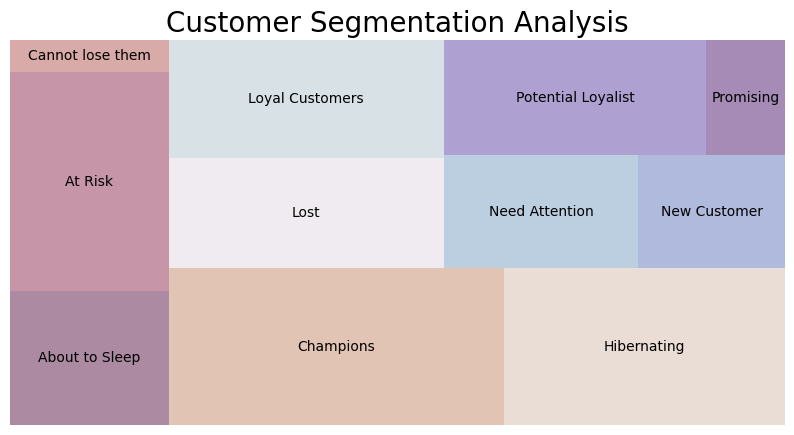

In [116]:
plt.figure(figsize=(10, 5))
palette =sns.color_palette('twilight_shifted_r',11)

# Setting Style
#sns.axes_style(style="whitegrid") # set seaborn plot style

#color palette
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

#Plotting
Segment = RFM_table.groupby('Segment')[['NewID']].count().index.get_level_values(0).tolist()
Customer_count = RFM_table.groupby('Segment')[['NewID']].count().reset_index().NewID.values.tolist()

sq.plot(sizes=Customer_count,label=Segment, alpha=.5 ,color=palette,text_kwargs={'fontsize': 10})

#Setting title
plt.title('Customer Segmentation Analysis', fontsize=20)
plt.axis('off')

plt.show()

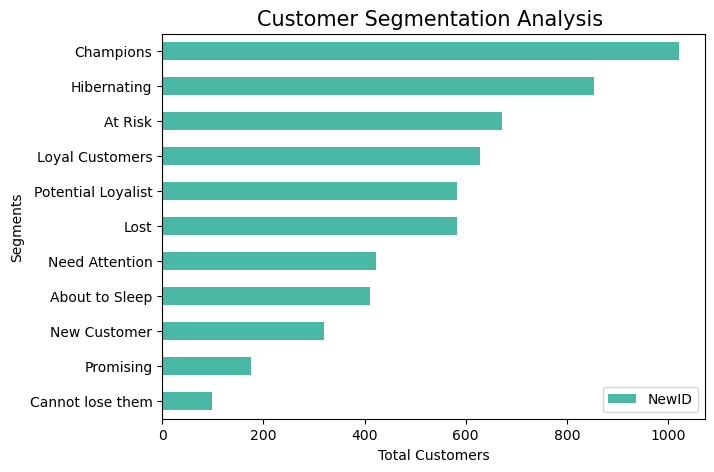

In [121]:
# Top selling products
customers = RFM_table.groupby(['Segment']).agg({'NewID':'count'})\
                            .sort_values('NewID', ascending=True).head(11)

# Total % of top selling orders 
for col in top_selling_products:
    orders_perc = top_selling_products / RFM_table['NewID'].count() *100

#Plotting
customers.plot(kind='barh', figsize=(7,5), color ='#1CA68F', alpha = 0.8)

# Setting title and label
plt.title("Customer Segmentation Analysis ", fontsize=15)
plt.xlabel("Total Customers")
plt.ylabel("Segments")

#Show the plot
plt.show()

# Insights

- **November** is the month with the highest orders and sales and **February** is the month with the lowest sales and revenue. Half of the months shows a decrease in sales as compared to previous months and 06 months shows an increase in sales as compared to previous sales.
The overall Revenue is $ 10 Million


- Mostly orders have received on **Thursday** followed by **Tuesday** and same is the pattern for revenue generation which means that Customers are mostly active in these two days. This helps to analyze the peak time of orders receiving.


- Majority orders have received from **12pm-3pm**. This is the peak time of orders receiving. This helps to analyze the most responsive time of customers.


- 92% orders have been received from **United Kingdom with 485122 orders**
 
 
- Most Order quantity sold is **"PAPER CRAFT , LITTLE BIRDIE"** with quantity sold 80995 (1.5% of total sold quantity)


- Top selling product is Dotcom Postage with **1.9% in Total Revenue ($ 206248.77)**


# Recommendations:

- Company should announce incentive offers in low order receiving months (Dec, Jan and April) to increase their revenue. Company should post their online ads by keeping the peak customer traffic time and days in mind to achieve optimum results.
 
 
- Top Customers need to be pampered to stay loyal and willing to spend a lot of money to shop, for example by encouraging them to spread the love with reward programs and send personalized product updates. They are early adopters and helps in promoting our brand.


- For customers having potential to become top customers and for recent customers, we need to build a healthy relationship to retain them over a long period of time by offering free trials, free shipping and complementary services. 


- For customers who are at risk and cannot lose them category, they are good spenders and we cannot lose them. It is very important to retain them by reconnecting, offer renewals, ask for their feedback. We can not lost them to competition.


- It is important to reconnect with the customers who need attention and are about to sleep by offering renewals and win back campaigns, give recommendations based on past purchases. We can ask for feedback to get insights about their pain points. 


- For customers who are almost lost and churn, we can recreate brand value and offer relevant product suggestions or asking for feedback to make relevant improvisations in our process.
